# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

Описание данных
*   airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
*   balcony — число балконов
*   ceiling_height — высота потолков (м)
*   cityCenters_nearest — расстояние до центра города (м)
*   days_exposition — сколько дней было размещено объявление (от публикации до снятия)
*   first_day_exposition — дата публикации
*   floor — этаж
*   floors_total — всего этажей в доме
*   is_apartment — апартаменты (булев тип)
*   kitchen_area — площадь кухни в квадратных метрах (м²)
*   last_price — цена на момент снятия с публикации
*   living_area — жилая площадь в квадратных метрах (м²)
*   locality_name — название населённого пункта
*   open_plan — свободная планировка (булев тип)
*   parks_around3000 — число парков в радиусе 3 км
*   parks_nearest — расстояние до ближайшего парка (м)
*   ponds_around3000 — число водоёмов в радиусе 3 км
*   ponds_nearest — расстояние до ближайшего водоёма (м)
*   rooms — число комнат
*   studio — квартира-студия (булев тип)
*   total_area — общая площадь квартиры в квадратных метрах (м²)
*   total_images — число фотографий квартиры в объявлении



### Изучение общей информации

In [ ]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# отключаем предупреджения
import warnings
warnings.simplefilter('ignore')

In [ ]:
# cчитаем данные из csv-файла в датафрейм и сохраните в переменную data
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [ ]:
# выведим первые 20 строчек датафрейма data на экран
pd.set_option('display.max_columns', None)
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [ ]:
# выведим основную информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [ ]:
# для корректного вывода и анализа даных избавимся от экспоненциальной записи
pd.options.display.float_format = '{:.3f}'.format

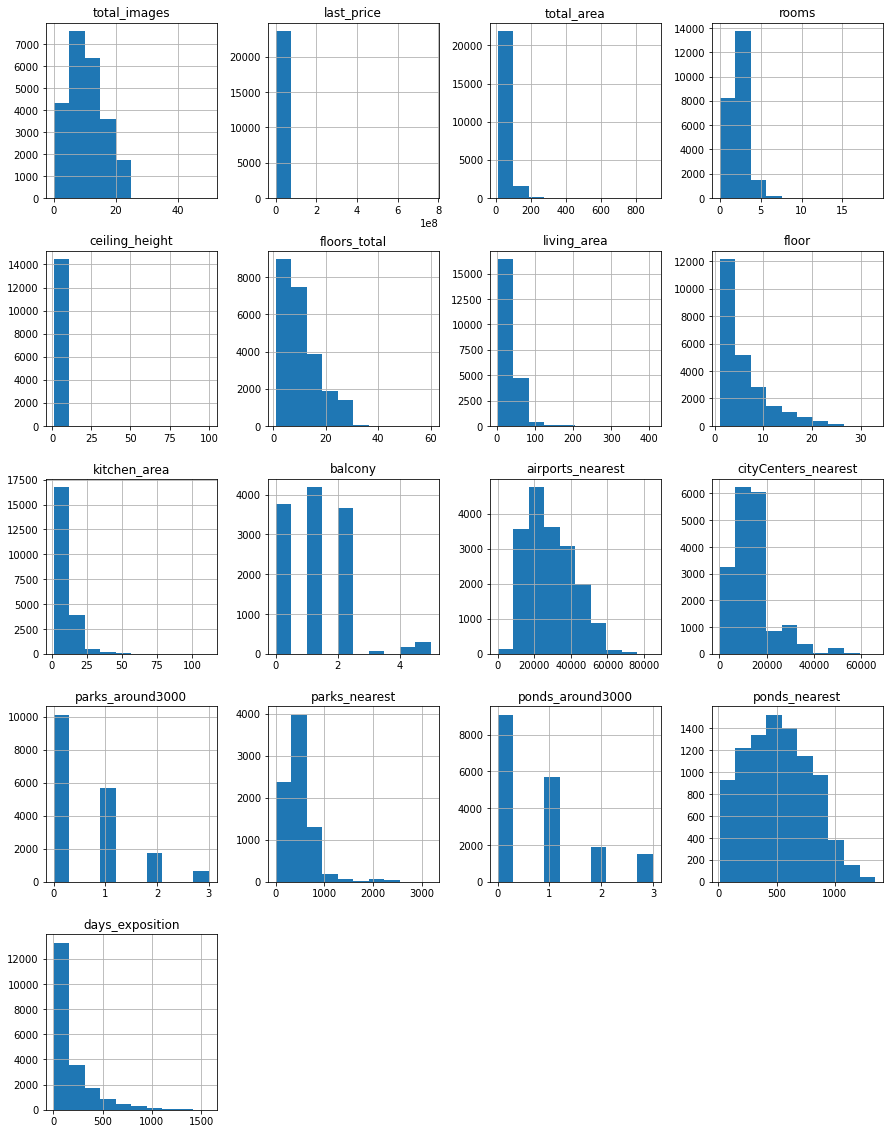

In [ ]:
# построим гистограмму для всех числовых столбцов таблицы на одном графике
data.hist(
    ['total_images', 'last_price', 'total_area', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition'] ,
    figsize=(15, 20)
);

Таким образом, первичный осмотр данных показал, что необходимо провести работу с названиями столбцов (столбец 'cityCenters_nearest'), обработать пропуски и типы данных. Данные шаги будут выполнены в предобработке данных

### Предобработка данных

#### Переименование столбцов

In [ ]:
# выведем перечень названий столбцов таблицы
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Необходимо привести все столбцы к змеиному регистру и записать прописью

In [ ]:
# переименонуем столбцы
data = data.rename(columns = {'cityCenters_nearest': 'city_сenters_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'})

In [ ]:
# проверка результатов - перечень названий столбцов
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Работа с пропусками

In [ ]:
# выведим количество пропущенных значений для каждого столбца, а также долю пропусков
print(data.isna().sum())
print()
data.isna().sum() / len(data) * 100

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_сenters_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64



total_images            0.000
last_price              0.000
total_area              0.000
first_day_exposition    0.000
rooms                   0.000
ceiling_height         38.799
floors_total            0.363
living_area             8.030
floor                   0.000
is_apartment           88.291
studio                  0.000
open_plan               0.000
kitchen_area            9.612
balcony                48.605
locality_name           0.207
airports_nearest       23.385
city_сenters_nearest   23.288
parks_around_3000      23.284
parks_nearest          65.910
ponds_around_3000      23.284
ponds_nearest          61.560
days_exposition        13.423
dtype: float64

In [ ]:
data.shape

(23699, 22)

In [ ]:
print(f'Суммарное количество пропусков: {data.isna().sum().sum()}')
print(f'Доля пропусков: {round(data.isna().sum().sum()/(data.shape[0]*data.shape[1]), 2)}')

Суммарное количество пропусков: 101441
Доля пропусков: 0.19


In [ ]:
# выведем описательную статистику для столбцов с пропусками
data.loc[:, ['is_apartment', 'ceiling_height', 'living_area', 'kitchen_area', 'balcony', 'airports_nearest', 'city_сenters_nearest', 'parks_around_3000', 'parks_nearest', 'ponds_around_3000', 'ponds_nearest', 'days_exposition']].describe()

,ceiling_height,living_area,kitchen_area,balcony,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,14504.000,21796.000,21421.000,12180.000,18157.000,18180.000,18181.000,8079.000,18181.000,9110.000,20518.000
mean,2.771,34.458,10.570,1.150,28793.672,14191.278,0.611,490.805,0.770,517.981,180.889
std,1.261,22.030,5.905,1.071,12630.881,8608.386,0.802,342.318,0.938,277.721,219.728
min,1.000,2.000,1.300,0.000,0.000,181.000,0.000,1.000,0.000,13.000,1.000
25%,2.520,18.600,7.000,0.000,18585.000,9238.000,0.000,288.000,0.000,294.000,45.000
50%,2.650,30.000,9.100,1.000,26726.000,13098.500,0.000,455.000,1.000,502.000,95.000
75%,2.800,42.300,12.000,2.000,37273.000,16293.000,1.000,612.000,1.000,729.000,232.000
max,100.000,409.700,112.000,5.000,84869.000,65968.000,3.000,3190.000,3.000,1344.000,1580.000


Изучим ситуацию с пропусками в данных, вписанных пользователем. Предположительно они связаны с человеческим фактором

Вероятнее всего пропуски в столбцах living_area, kitchen_area и ceiling_height объяснимы тем, что пользователи не смогли или не захотели измерять метраж помещения

In [ ]:
# проверим наше предположение, выведим таблицу с одновременными пропусками в метраже жилой зоны и кухни
data.query('living_area.isna() and kitchen_area.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,NaN,14.000,NaN,9,NaN,False,False,NaN,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
30,12,2200000.000,32.800,2018-02-19T00:00:00,1,NaN,9.000,NaN,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.000
37,10,1990000.000,45.800,2017-10-28T00:00:00,2,2.500,5.000,NaN,1,NaN,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.000
44,13,5350000.000,40.000,2018-11-18T00:00:00,1,NaN,22.000,NaN,3,NaN,False,False,NaN,1.000,Санкт-Петербург,30471.000,11603.000,1.000,620.000,1.000,1152.000,NaN
59,15,6300000.000,46.500,2017-03-06T00:00:00,1,NaN,13.000,NaN,13,NaN,False,False,NaN,NaN,Санкт-Петербург,11125.000,14501.000,0.000,NaN,0.000,NaN,336.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23632,20,5000000.000,38.000,2018-06-23T00:00:00,1,2.550,16.000,NaN,15,NaN,False,False,NaN,1.000,Санкт-Петербург,31118.000,7257.000,1.000,241.000,1.000,230.000,113.000
23642,14,5950000.000,80.300,2018-07-03T00:00:00,3,2.700,12.000,NaN,5,NaN,False,False,NaN,NaN,Колпино,27933.000,33719.000,0.000,NaN,2.000,562.000,60.000
23663,12,6400000.000,88.000,2018-01-12T00:00:00,4,2.550,10.000,NaN,1,NaN,False,False,NaN,NaN,Санкт-Петербург,33642.000,13943.000,0.000,NaN,2.000,844.000,59.000
23670,9,2450000.000,45.600,2018-02-08T00:00:00,1,2.800,9.000,NaN,2,NaN,False,False,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.000


In [ ]:
data['open_plan'].value_counts()

False    23632
True        67
Name: open_plan, dtype: int64

Таким образом, в 1464 записях совпадают пропуски в данных столбцах, что составляет 1464/1903*100 = 77% пропусков в living_area и 1464/2278*100 = 64% пропусков в kitchen_area

**Вывод**: пропуски в столбцах living_area, kitchen_area, ceiling_height связаны с человеческим фактором, не будем их заменять или удалять

Аналогично floors_total, где небольшое число пропусков, которые объясняются теми же причинами. Заменим их на этаж квартиры

Пропуски в названии местности заменим на unknown, пусть их и немного

In [ ]:
data['floors_total'] = data['floors_total'].fillna(data['floor'])

In [ ]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_сenters_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [ ]:
data['locality_name'] = data['locality_name'].fillna('unknown')

In [ ]:
# подавляющее число пропусков выявлено в столбце is_apartment, посчитаем количество иных значений
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Причины столь масштабного кол-ва пропусков неизвестна. Вероятно пользователи так же не поняли, что нужно вписывать, поэтому образовалось множество пропусков. Оставим их

In [ ]:
# неуказанное число балконов означает их отсутствие, заменим пропуски на 0
data['balcony'] = data['balcony'].fillna(0)

Далее оценим пропуски полученные автоматически на основе картографических данных, то есть по разработанной программе, где вероятность сбоя меньше, то есть ошибки связаны с отсутсвием каких-либо мест на картах

Пропуски в столбцах airports_nearest и city_сenters_nearest предположительно связаны с отсутсвием по близости аэропортов и центра города

In [ ]:
# составим сводную таблицу, чтобы понять в каких населённых пунктах преимущественно пропуски в данных с центром города
data[data['city_сenters_nearest'].isna()].pivot_table(index='locality_name', values='total_images', aggfunc='count').sort_values(by='total_images', ascending=False)

,total_images
locality_name,
посёлок Мурино,522
Всеволожск,398
Гатчина,307
деревня Кудрово,299
Выборг,237
...,...
поселок городского типа Большая Ижора,1
поселок Цвылёво,1
деревня Трубников Бор,1


Как и предпологалось, населённые пункты оказались сёлами, деревнями и посёлками, в которых не может быть центра города. Рассмотрим несколько вариантов пропусков далее

In [ ]:
# не указано число парков поблизости, при этом указано расстояние до ближайшего парка
data.query('parks_around_3000.isna() and not parks_nearest.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


In [ ]:
# число парков указано, но нет данных о ближайших парках
data.query('not parks_around_3000.isna() and parks_nearest.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,NaN,11.000,18.600,1,NaN,False,False,11.000,2.000,посёлок Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000
6,6,3700000.000,37.300,2017-11-02T00:00:00,1,NaN,26.000,10.600,6,NaN,False,False,14.400,1.000,посёлок Парголово,52996.000,19143.000,0.000,NaN,0.000,NaN,155.000
7,5,7915000.000,71.600,2019-04-18T00:00:00,2,NaN,24.000,NaN,22,NaN,False,False,18.900,2.000,Санкт-Петербург,23982.000,11634.000,0.000,NaN,0.000,NaN,NaN
9,18,5400000.000,61.000,2017-02-26T00:00:00,3,2.500,9.000,43.600,7,NaN,False,False,6.500,2.000,Санкт-Петербург,50898.000,15008.000,0.000,NaN,0.000,NaN,289.000
11,9,3300000.000,44.000,2018-08-27T00:00:00,2,NaN,5.000,31.000,4,False,False,False,6.000,1.000,Ломоносов,48252.000,51677.000,0.000,NaN,0.000,NaN,7.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.000,145.000,2018-11-02T00:00:00,4,3.000,26.000,71.400,17,NaN,False,False,15.600,0.000,Санкт-Петербург,11827.000,11459.000,0.000,NaN,0.000,NaN,NaN
23685,15,2490000.000,31.000,2019-01-24T00:00:00,1,2.500,5.000,17.300,5,NaN,False,False,5.600,1.000,Ломоносов,48393.000,51818.000,0.000,NaN,0.000,NaN,NaN
23687,6,3200000.000,39.000,2017-12-16T00:00:00,1,NaN,9.000,20.000,6,NaN,False,False,11.000,2.000,Санкт-Петербург,40837.000,16704.000,0.000,NaN,0.000,NaN,38.000
23688,19,9200000.000,101.000,2019-04-01T00:00:00,3,3.050,15.000,63.000,12,NaN,False,False,15.000,0.000,Санкт-Петербург,15632.000,14428.000,0.000,NaN,0.000,NaN,23.000


In [ ]:
# рассмотрим данный случай и выведем описательную статистику по ближайшим паркам
data.query('not parks_around_3000.isna() and parks_nearest.isna()')['parks_around_3000'].describe()

count   10102.000
mean        0.000
std         0.000
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         0.000
Name: parks_around_3000, dtype: float64

Как мы можем заметить, число ближайших парков в даном случае 0. Остаётся 15620-10102=5518 (совпадает с числом пропусков в столбце parks_around_3000) строк данных, в которых: пропуски в обоих столбцах

In [ ]:
# проведём ту же работу с прудами
data.query('ponds_around_3000.isna() and not ponds_nearest.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


In [ ]:
data.query('not ponds_around_3000.isna() and ponds_nearest.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,NaN,11.000,18.600,1,NaN,False,False,11.000,2.000,посёлок Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000
6,6,3700000.000,37.300,2017-11-02T00:00:00,1,NaN,26.000,10.600,6,NaN,False,False,14.400,1.000,посёлок Парголово,52996.000,19143.000,0.000,NaN,0.000,NaN,155.000
7,5,7915000.000,71.600,2019-04-18T00:00:00,2,NaN,24.000,NaN,22,NaN,False,False,18.900,2.000,Санкт-Петербург,23982.000,11634.000,0.000,NaN,0.000,NaN,NaN
9,18,5400000.000,61.000,2017-02-26T00:00:00,3,2.500,9.000,43.600,7,NaN,False,False,6.500,2.000,Санкт-Петербург,50898.000,15008.000,0.000,NaN,0.000,NaN,289.000
11,9,3300000.000,44.000,2018-08-27T00:00:00,2,NaN,5.000,31.000,4,False,False,False,6.000,1.000,Ломоносов,48252.000,51677.000,0.000,NaN,0.000,NaN,7.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.000,145.000,2018-11-02T00:00:00,4,3.000,26.000,71.400,17,NaN,False,False,15.600,0.000,Санкт-Петербург,11827.000,11459.000,0.000,NaN,0.000,NaN,NaN
23685,15,2490000.000,31.000,2019-01-24T00:00:00,1,2.500,5.000,17.300,5,NaN,False,False,5.600,1.000,Ломоносов,48393.000,51818.000,0.000,NaN,0.000,NaN,NaN
23687,6,3200000.000,39.000,2017-12-16T00:00:00,1,NaN,9.000,20.000,6,NaN,False,False,11.000,2.000,Санкт-Петербург,40837.000,16704.000,0.000,NaN,0.000,NaN,38.000
23688,19,9200000.000,101.000,2019-04-01T00:00:00,3,3.050,15.000,63.000,12,NaN,False,False,15.000,0.000,Санкт-Петербург,15632.000,14428.000,0.000,NaN,0.000,NaN,23.000


In [ ]:
data.query('not ponds_around_3000.isna() and ponds_nearest.isna()')['ponds_around_3000'].describe()

count   9071.000
mean       0.000
std        0.000
min        0.000
25%        0.000
50%        0.000
75%        0.000
max        0.000
Name: ponds_around_3000, dtype: float64

Делаем аналогичный вывод. Таким образом, данные, выведенные программой имеют пропуски из-за отсутствия географических мест. Заменим их на нулевые значения

In [ ]:
def make_null(column):
    data[column] = data[column].fillna(0)
make_null(['ponds_around_3000', 'ponds_nearest', 'parks_nearest', 'parks_around_3000', 'airports_nearest', 'city_сenters_nearest'])

Пропуски в days_exposition связаны с тем, что вероятно объявление ещё не снято на дату записи данных. Оставим пропуски

In [ ]:
# ещё раз оценим пропуски
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest            0
city_сenters_nearest        0
parks_around_3000           0
parks_nearest               0
ponds_around_3000           0
ponds_nearest               0
days_exposition          3181
dtype: int64

#### Работа с типами даных

In [ ]:
# выведем таблицу и информацию по ней, чтобы оценить типы даных и необходимость их замены
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.000,108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,NaN,False,False,25.000,0.000,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,NaN
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,NaN,11.000,18.600,1,NaN,False,False,11.000,2.000,посёлок Шушары,12817.000,18603.000,0.000,0.000,0.000,0.000,81.000
2,10,5196000.000,56.000,2015-08-20T00:00:00,2,NaN,5.000,34.300,4,NaN,False,False,8.300,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,NaN,14.000,NaN,9,NaN,False,False,NaN,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
4,2,10000000.000,100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,NaN,False,False,41.000,0.000,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000
5,10,2890000.000,30.400,2018-09-10T00:00:00,1,NaN,12.000,14.400,5,NaN,False,False,9.100,0.000,городской посёлок Янино-1,0.000,0.000,0.000,0.000,0.000,0.000,55.000
6,6,3700000.000,37.300,2017-11-02T00:00:00,1,NaN,26.000,10.600,6,NaN,False,False,14.400,1.000,посёлок Парголово,52996.000,19143.000,0.000,0.000,0.000,0.000,155.000
7,5,7915000.000,71.600,2019-04-18T00:00:00,2,NaN,24.000,NaN,22,NaN,False,False,18.900,2.000,Санкт-Петербург,23982.000,11634.000,0.000,0.000,0.000,0.000,NaN
8,20,2900000.000,33.160,2018-05-23T00:00:00,1,NaN,27.000,15.430,26,NaN,False,False,8.810,0.000,посёлок Мурино,0.000,0.000,0.000,0.000,0.000,0.000,189.000
9,18,5400000.000,61.000,2017-02-26T00:00:00,3,2.500,9.000,43.600,7,NaN,False,False,6.500,2.000,Санкт-Петербург,50898.000,15008.000,0.000,0.000,0.000,0.000,289.000


In [ ]:
# изменим тип числа с плавающей точкой на целочисленное значение, где в этом есть необходимость
# (то есть исчисление ведётся в натуральных числах)
def make_int(column):
    data[column] = data[column].astype(int)
make_int(['last_price', 'balcony', 'airports_nearest', 'city_сenters_nearest', 'parks_around_3000', 'parks_nearest', 'ponds_around_3000', 'ponds_nearest', 'floors_total'])

In [ ]:
# так как в столбце days_exposition есть пропуски заменим тип данных на Int64, который их пропускает
data['days_exposition'] = round(data['days_exposition'])
data['days_exposition'] = data['days_exposition'].astype('Int64')

In [ ]:
# переведём дату в тип datetime для корректной работы с ней
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [ ]:
# проверим корректность вывода
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108.000,2019-03-07,3,2.700,16,51.000,8,NaN,False,False,25.000,0,Санкт-Петербург,18863,16028,1,482,2,755,<NA>
1,7,3350000,40.400,2018-12-04,1,NaN,11,18.600,1,NaN,False,False,11.000,2,посёлок Шушары,12817,18603,0,0,0,0,81
2,10,5196000,56.000,2015-08-20,2,NaN,5,34.300,4,NaN,False,False,8.300,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159.000,2015-07-24,3,NaN,14,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100.000,2018-06-19,2,3.030,14,32.000,13,NaN,False,False,41.000,0,Санкт-Петербург,31856,8098,2,112,1,48,121
5,10,2890000,30.400,2018-09-10,1,NaN,12,14.400,5,NaN,False,False,9.100,0,городской посёлок Янино-1,0,0,0,0,0,0,55
6,6,3700000,37.300,2017-11-02,1,NaN,26,10.600,6,NaN,False,False,14.400,1,посёлок Парголово,52996,19143,0,0,0,0,155
7,5,7915000,71.600,2019-04-18,2,NaN,24,NaN,22,NaN,False,False,18.900,2,Санкт-Петербург,23982,11634,0,0,0,0,<NA>
8,20,2900000,33.160,2018-05-23,1,NaN,27,15.430,26,NaN,False,False,8.810,0,посёлок Мурино,0,0,0,0,0,0,189
9,18,5400000,61.000,2017-02-26,3,2.500,9,43.600,7,NaN,False,False,6.500,2,Санкт-Петербург,50898,15008,0,0,0,0,289


#### Работа с дубликатами

In [ ]:
# выявим полные дубликаты в данных
data.duplicated().sum()

0

In [ ]:
# изучим уникальные значения в названиях местоположения
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Большая часть дубликатов связана с разным использованием названий типов населённых пунктов. Тогда создадим столбец с сокращённым названием, пусть в некоторых случаях такая запись и будет некорректной с языковой стороны. Таким образом, мы сможем обрабатывать данные по этому столбцу

In [ ]:
def make_short(name):
    name = name.replace('ё', 'е')
    name = name.split()
    new_name = []
    parts_to_replace = ['деревня', 'садовое', 'товарищество', 'село', 'поселок', 'типа', 'городского', 'городской', 'коттеджный']
    for part in name:
        if part not in parts_to_replace:
            new_name.append(part)
    return ' '.join(new_name)

In [ ]:
data['locality_short_name'] = data['locality_name'].apply(make_short)

In [ ]:
data['locality_short_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [ ]:
# выведем описательную статистику, чтобы оценить наличие аномалий в столбцах
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23699.000,23699.000,23699.000,23699.000,14504.000,23699.000,21796.000,23699.000,21421.000,23699.000,23699.000,23699.000,23699.000,23699.000,23699.000,23699.000,20518.000
mean,9.858,6541548.772,60.349,2.071,2.771,10.671,34.458,5.892,10.570,0.591,22060.285,10886.427,0.469,167.315,0.591,199.114,180.889
std,5.683,10887013.268,35.654,1.078,1.261,6.596,22.030,4.885,5.905,0.959,16455.276,9634.614,0.749,306.710,0.884,305.189,219.728
min,0.000,12190.000,12.000,0.000,1.000,1.000,2.000,1.000,1.300,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
25%,6.000,3400000.000,40.000,1.000,2.520,5.000,18.600,2.000,7.000,0.000,10196.500,2242.000,0.000,0.000,0.000,0.000,45.000
50%,9.000,4650000.000,52.000,2.000,2.650,9.000,30.000,4.000,9.100,0.000,21869.000,11247.000,0.000,0.000,0.000,0.000,95.000
75%,14.000,6800000.000,69.900,3.000,2.800,16.000,42.300,8.000,12.000,1.000,34327.000,15248.500,1.000,301.000,1.000,389.000,232.000
max,50.000,763000000.000,900.000,19.000,100.000,60.000,409.700,33.000,112.000,5.000,84869.000,65968.000,3.000,3190.000,3.000,1344.000,1580.000


Исходя из таблицы не выявлено аномалий - отрицательных значений, тем не менее, в некоторых столбцах максимальные значения сильно завышены. Проведём работу с ними на следующих этапах

### Добавим в таблицу новые столбцы

In [ ]:
# добавим цену одного квадратного метра
data['sqr_m_price'] = round(data['last_price']/data['total_area'], 2)

In [ ]:
# добавим столбцы с денём недели, месяцем и годом публикации объявления
data['week_number'] = data['first_day_exposition'].dt.weekday
data['month_number'] = data['first_day_exposition'].dt.month
data['year_number'] = data['first_day_exposition'].dt.year

In [ ]:
# добавим тип этажа квартиры (значения — «первый», «последний», «другой»)
def floor_type(row):
    floor = row['floor']
    total_floor = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == total_floor:
        return 'последний'
    return 'другой'

In [ ]:
data['floor_type'] = data.apply(floor_type, axis=1)

In [ ]:
# расстояние до центра города в километрах
data['city_сenters_nearest_km'] = round(data['city_сenters_nearest']/1000)
data['city_сenters_nearest_km'] = data['city_сenters_nearest_km'].astype(int)

In [ ]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_short_name,sqr_m_price,week_number,month_number,year_number,floor_type,city_сenters_nearest_km
0,20,13000000,108.000,2019-03-07,3,2.700,16,51.000,8,NaN,False,False,25.000,0,Санкт-Петербург,18863,16028,1,482,2,755,<NA>,Санкт-Петербург,120370.370,3,3,2019,другой,16
1,7,3350000,40.400,2018-12-04,1,NaN,11,18.600,1,NaN,False,False,11.000,2,посёлок Шушары,12817,18603,0,0,0,0,81,Шушары,82920.790,1,12,2018,первый,19
2,10,5196000,56.000,2015-08-20,2,NaN,5,34.300,4,NaN,False,False,8.300,0,Санкт-Петербург,21741,13933,1,90,2,574,558,Санкт-Петербург,92785.710,3,8,2015,другой,14
3,0,64900000,159.000,2015-07-24,3,NaN,14,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098,6800,2,84,3,234,424,Санкт-Петербург,408176.100,4,7,2015,другой,7
4,2,10000000,100.000,2018-06-19,2,3.030,14,32.000,13,NaN,False,False,41.000,0,Санкт-Петербург,31856,8098,2,112,1,48,121,Санкт-Петербург,100000.000,1,6,2018,другой,8
5,10,2890000,30.400,2018-09-10,1,NaN,12,14.400,5,NaN,False,False,9.100,0,городской посёлок Янино-1,0,0,0,0,0,0,55,Янино-1,95065.790,0,9,2018,другой,0
6,6,3700000,37.300,2017-11-02,1,NaN,26,10.600,6,NaN,False,False,14.400,1,посёлок Парголово,52996,19143,0,0,0,0,155,Парголово,99195.710,3,11,2017,другой,19
7,5,7915000,71.600,2019-04-18,2,NaN,24,NaN,22,NaN,False,False,18.900,2,Санкт-Петербург,23982,11634,0,0,0,0,<NA>,Санкт-Петербург,110544.690,3,4,2019,другой,12
8,20,2900000,33.160,2018-05-23,1,NaN,27,15.430,26,NaN,False,False,8.810,0,посёлок Мурино,0,0,0,0,0,0,189,Мурино,87454.760,2,5,2018,другой,0
9,18,5400000,61.000,2017-02-26,3,2.500,9,43.600,7,NaN,False,False,6.500,2,Санкт-Петербург,50898,15008,0,0,0,0,289,Санкт-Петербург,88524.590,6,2,2017,другой,15


### Исследовательский анализ данных

#### Описание параметров

Изучим параметры объектов и построим отдельные гистограммы для каждого из этих параметров

##### Общая площадь

In [ ]:
# изучим общую площадь
data['total_area'].describe()

count   23699.000
mean       60.349
std        35.654
min        12.000
25%        40.000
50%        52.000
75%        69.900
max       900.000
Name: total_area, dtype: float64

<AxesSubplot:>

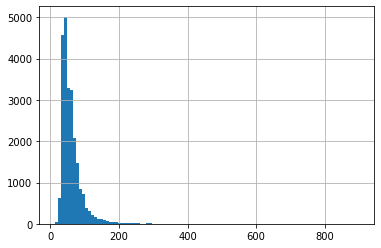

In [ ]:
# видим, что после третьего квантиля значения резко возрасли, то есть в этих 25% данных есть экстремальные значения
# построим гистограмму, чтобы их оценить
data['total_area'].hist(bins=100)

In [ ]:
data.query('total_area>200')['living_area'].describe()

count   199.000
mean    165.197
std      56.483
min      55.000
25%     133.500
50%     159.500
75%     182.900
max     409.700
Name: living_area, dtype: float64

<AxesSubplot:xlabel='total_area'>

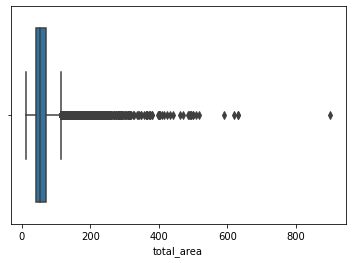

In [ ]:
# построим диаграмму размаха для выявления выбросов
sns.boxplot(x=data['total_area'])

Таким образом, оценивая по площади жилого пространства, аномалий не выявлено - большие площади соответствуют друг другу. Тем не менее удалим строки с выбросами для корректного анализа

In [ ]:

def emissions(df, column):
    '''Функция для подсчёта процента выбросов в столбце'''
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return f"процент выбросов составляет {round(len(data[(data[column] <= lower_bound) | (data[column] >= upper_bound)])/data.shape[0]*100, 2)}"

In [ ]:
# создадим функцию
def remove_emissions(df, column):
    '''Функция для удаления выбросов через межквартильный размах'''
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].reset_index(drop=True)

In [ ]:
# создадим ф-ю для расчёта жёстких выбросов
def heavy_emissions_num(df, column):
    '''Функция для подсчёта процента жестких выбросов в столбце'''
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    return f"процент жёстких выбросов составляет {round(len(data[(data[column] <= lower_bound) | (data[column] >= upper_bound)])/data.shape[0]*100, 2)}"

In [ ]:
def remove_heavy_emissions(df, column):
    '''Функция для удаления выбросов через межквартильный размах'''
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].reset_index(drop=True)

In [ ]:
emissions(data, 'total_area')

'процент выбросов составляет 5.23'

In [ ]:
heavy_emissions_num(data, 'total_area')

'процент жёстких выбросов составляет 1.98'

In [ ]:
# удалим жёсткие выбросы
data = remove_emissions(data, 'total_area')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_short_name,sqr_m_price,week_number,month_number,year_number,floor_type,city_сenters_nearest_km
0,20,13000000,108.000,2019-03-07,3,2.700,16,51.000,8,NaN,False,False,25.000,0,Санкт-Петербург,18863,16028,1,482,2,755,<NA>,Санкт-Петербург,120370.370,3,3,2019,другой,16
1,7,3350000,40.400,2018-12-04,1,NaN,11,18.600,1,NaN,False,False,11.000,2,посёлок Шушары,12817,18603,0,0,0,0,81,Шушары,82920.790,1,12,2018,первый,19
2,10,5196000,56.000,2015-08-20,2,NaN,5,34.300,4,NaN,False,False,8.300,0,Санкт-Петербург,21741,13933,1,90,2,574,558,Санкт-Петербург,92785.710,3,8,2015,другой,14
3,2,10000000,100.000,2018-06-19,2,3.030,14,32.000,13,NaN,False,False,41.000,0,Санкт-Петербург,31856,8098,2,112,1,48,121,Санкт-Петербург,100000.000,1,6,2018,другой,8
4,10,2890000,30.400,2018-09-10,1,NaN,12,14.400,5,NaN,False,False,9.100,0,городской посёлок Янино-1,0,0,0,0,0,0,55,Янино-1,95065.790,0,9,2018,другой,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22454,9,4600000,62.400,2016-08-05,3,2.600,9,40.000,8,NaN,False,False,8.000,0,Петергоф,45602,34104,1,352,1,675,239,Петергоф,73717.950,4,8,2016,другой,34
22455,14,3100000,59.000,2018-01-15,3,NaN,5,38.000,4,NaN,False,False,8.500,0,Тосно,0,0,0,0,0,0,45,Тосно,52542.370,0,1,2018,другой,0
22456,18,2500000,56.700,2018-02-11,2,NaN,3,29.700,1,NaN,False,False,NaN,0,село Рождествено,0,0,0,0,0,0,<NA>,Рождествено,44091.710,6,2,2018,первый,0
22457,13,11475000,76.750,2017-03-28,2,3.000,17,NaN,12,NaN,False,False,23.300,2,Санкт-Петербург,39140,10364,2,173,3,196,602,Санкт-Петербург,149511.400,1,3,2017,другой,10


##### Жилая площадь

In [ ]:
# изучим жилую площадь
data['living_area'].describe()

count   20685.000
mean       31.081
std        13.509
min         2.000
25%        18.300
50%        29.800
75%        40.000
max       101.000
Name: living_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

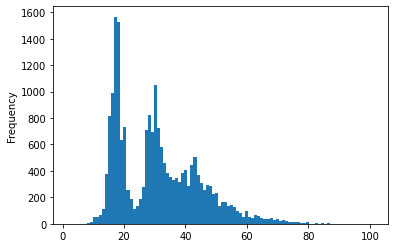

In [ ]:
data['living_area'].plot(bins=100, kind='hist')

In [ ]:
# виден необычный спад в значениях примерно от 21 до 24 - проверим корректность данных
data.query('21 < living_area < 24').describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,sqr_m_price,week_number,month_number,year_number,city_сenters_nearest_km
count,419.000,419.000,419.000,419.000,265.000,419.000,419.000,419.000,389.000,419.000,419.000,419.000,419.000,419.000,419.000,419.000,352.000,419.000,419.000,419.000,419.000,419.000
mean,9.484,4759282.740,44.436,1.272,2.926,11.570,22.256,6.379,11.229,0.599,22998.527,10665.019,0.501,202.062,0.640,212.628,156.727,105520.378,2.718,6.489,2017.420,10.647
std,5.636,2273509.578,9.396,0.568,2.077,6.969,0.733,5.530,5.450,0.870,16335.798,8863.486,0.730,355.431,0.916,309.252,175.315,37027.548,1.838,3.488,1.028,8.880
min,0.000,450000.000,25.300,0.000,2.400,1.000,21.040,1.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,10714.290,0.000,1.000,2014.000,0.000
25%,5.000,3367465.000,38.000,1.000,2.550,5.000,21.665,2.000,7.500,0.000,11342.000,4177.500,0.000,0.000,0.000,0.000,37.000,83714.910,1.000,3.000,2017.000,4.000
50%,9.000,4400000.000,43.700,1.000,2.700,10.000,22.000,4.000,10.200,0.000,22490.000,11144.000,0.000,0.000,0.000,0.000,89.000,105098.040,3.000,7.000,2018.000,11.000
75%,13.000,5585395.500,49.000,2.000,2.800,16.000,23.000,9.000,13.000,1.000,34620.000,14253.000,1.000,372.000,1.000,394.000,215.500,125000.000,4.000,10.000,2018.000,14.000
max,37.000,18500000.000,93.000,4.000,27.000,36.000,23.900,28.000,47.000,5.000,68556.000,51865.000,3.000,2633.000,3.000,1160.000,1001.000,272058.820,6.000,12.000,2019.000,52.000


In [ ]:
# так как значения жилой площади и площади в целом взаимозависимы, то проверим корректность больших площадей
data.query('living_area > 70')['total_area'].describe()

count   178.000
mean    106.026
std       6.630
min      83.660
25%     101.900
50%     107.800
75%     111.225
max     114.600
Name: total_area, dtype: float64

In [ ]:
# сделаем аналогичную работу с метражом куханной площади
data.query('living_area > 70')['kitchen_area'].describe()

count   164.000
mean     12.182
std       4.537
min       5.900
25%      10.000
50%      11.000
75%      13.100
max      43.400
Name: kitchen_area, dtype: float64

<AxesSubplot:xlabel='living_area'>

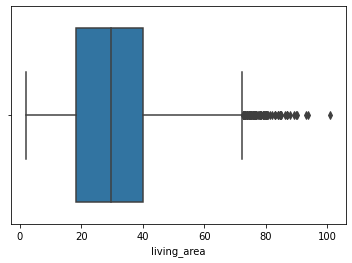

In [ ]:
# ничего необычного не выявлено, построим боксплот и оценим долю выбросов
sns.boxplot(x=data['living_area'])

In [ ]:
emissions(data, 'living_area')

'процент выбросов составляет 0.56'

In [ ]:
heavy_emissions_num(data, 'living_area')

'процент жёстких выбросов составляет 0.0'

In [ ]:
data = remove_emissions(data, 'living_area')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_short_name,sqr_m_price,week_number,month_number,year_number,floor_type,city_сenters_nearest_km
0,20,13000000,108.000,2019-03-07,3,2.700,16,51.000,8,NaN,False,False,25.000,0,Санкт-Петербург,18863,16028,1,482,2,755,<NA>,Санкт-Петербург,120370.370,3,3,2019,другой,16
1,7,3350000,40.400,2018-12-04,1,NaN,11,18.600,1,NaN,False,False,11.000,2,посёлок Шушары,12817,18603,0,0,0,0,81,Шушары,82920.790,1,12,2018,первый,19
2,10,5196000,56.000,2015-08-20,2,NaN,5,34.300,4,NaN,False,False,8.300,0,Санкт-Петербург,21741,13933,1,90,2,574,558,Санкт-Петербург,92785.710,3,8,2015,другой,14
3,2,10000000,100.000,2018-06-19,2,3.030,14,32.000,13,NaN,False,False,41.000,0,Санкт-Петербург,31856,8098,2,112,1,48,121,Санкт-Петербург,100000.000,1,6,2018,другой,8
4,10,2890000,30.400,2018-09-10,1,NaN,12,14.400,5,NaN,False,False,9.100,0,городской посёлок Янино-1,0,0,0,0,0,0,55,Янино-1,95065.790,0,9,2018,другой,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20555,2,1350000,30.000,2017-07-07,1,NaN,5,17.500,4,NaN,False,False,6.000,0,Тихвин,0,0,0,0,0,0,413,Тихвин,45000.000,4,7,2017,другой,0
20556,9,4600000,62.400,2016-08-05,3,2.600,9,40.000,8,NaN,False,False,8.000,0,Петергоф,45602,34104,1,352,1,675,239,Петергоф,73717.950,4,8,2016,другой,34
20557,14,3100000,59.000,2018-01-15,3,NaN,5,38.000,4,NaN,False,False,8.500,0,Тосно,0,0,0,0,0,0,45,Тосно,52542.370,0,1,2018,другой,0
20558,18,2500000,56.700,2018-02-11,2,NaN,3,29.700,1,NaN,False,False,NaN,0,село Рождествено,0,0,0,0,0,0,<NA>,Рождествено,44091.710,6,2,2018,первый,0


##### Площадь кухни

In [ ]:
# изучим площадь кухни
data['kitchen_area'].describe()

count   19781.000
mean        9.849
std         4.281
min         1.300
25%         7.000
50%         9.000
75%        11.180
max        55.700
Name: kitchen_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

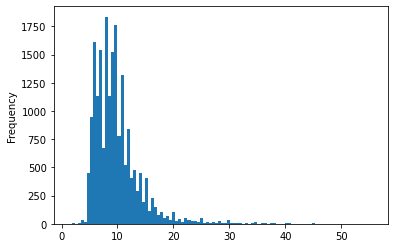

In [ ]:
data['kitchen_area'].plot(bins=100, kind='hist')

In [ ]:
data.query('kitchen_area > 35')['total_area'].describe()

count    60.000
mean     96.214
std      12.991
min      62.400
25%      88.925
50%      99.450
75%     107.000
max     114.000
Name: total_area, dtype: float64

<AxesSubplot:xlabel='kitchen_area'>

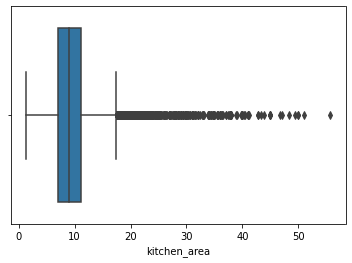

In [ ]:
# ничего необычного не выявлено, построим боксплот и оценим долю выбросов
sns.boxplot(x=data['kitchen_area'])

In [ ]:
emissions(data, 'kitchen_area')

'процент выбросов составляет 4.38'

In [ ]:
heavy_emissions_num(data, 'kitchen_area')

'процент жёстких выбросов составляет 1.55'

In [ ]:
# удалим жёсткие выбросы
data = remove_heavy_emissions(data, 'kitchen_area')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_short_name,sqr_m_price,week_number,month_number,year_number,floor_type,city_сenters_nearest_km
0,7,3350000,40.400,2018-12-04,1,NaN,11,18.600,1,NaN,False,False,11.000,2,посёлок Шушары,12817,18603,0,0,0,0,81,Шушары,82920.790,1,12,2018,первый,19
1,10,5196000,56.000,2015-08-20,2,NaN,5,34.300,4,NaN,False,False,8.300,0,Санкт-Петербург,21741,13933,1,90,2,574,558,Санкт-Петербург,92785.710,3,8,2015,другой,14
2,10,2890000,30.400,2018-09-10,1,NaN,12,14.400,5,NaN,False,False,9.100,0,городской посёлок Янино-1,0,0,0,0,0,0,55,Янино-1,95065.790,0,9,2018,другой,0
3,6,3700000,37.300,2017-11-02,1,NaN,26,10.600,6,NaN,False,False,14.400,1,посёлок Парголово,52996,19143,0,0,0,0,155,Парголово,99195.710,3,11,2017,другой,19
4,20,2900000,33.160,2018-05-23,1,NaN,27,15.430,26,NaN,False,False,8.810,0,посёлок Мурино,0,0,0,0,0,0,189,Мурино,87454.760,2,5,2018,другой,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19457,11,9470000,72.900,2016-10-13,2,2.750,25,40.300,7,NaN,False,False,10.600,1,Санкт-Петербург,19424,4489,0,0,1,806,519,Санкт-Петербург,129903.980,3,10,2016,другой,4
19458,2,1350000,30.000,2017-07-07,1,NaN,5,17.500,4,NaN,False,False,6.000,0,Тихвин,0,0,0,0,0,0,413,Тихвин,45000.000,4,7,2017,другой,0
19459,9,4600000,62.400,2016-08-05,3,2.600,9,40.000,8,NaN,False,False,8.000,0,Петергоф,45602,34104,1,352,1,675,239,Петергоф,73717.950,4,8,2016,другой,34
19460,14,3100000,59.000,2018-01-15,3,NaN,5,38.000,4,NaN,False,False,8.500,0,Тосно,0,0,0,0,0,0,45,Тосно,52542.370,0,1,2018,другой,0


Площадь кухни относительно небольшая, в 50% случаев в пределе от 7 до 11 м^2

##### Цена объекта

In [ ]:
# изучим цену объекта
data['last_price'].describe()

count      19462.000
mean     5194185.654
std      3046682.840
min       430000.000
25%      3400000.000
50%      4500000.000
75%      6200000.000
max     48000000.000
Name: last_price, dtype: float64

Средняя цена отличается от медианной в большую сторону из-за выбросов. В среднем квартиры выставляют по 4-5 млн, в большинстве случаев не превышая 6 млн

<AxesSubplot:ylabel='Frequency'>

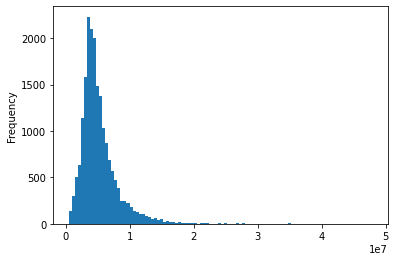

In [ ]:
data['last_price'].plot(bins=100, kind='hist')

In [ ]:
data.query('last_price > 1000000')['total_area'].describe()

count   19270.000
mean       54.129
std        18.408
min        14.000
25%        40.000
50%        50.100
75%        65.000
max       114.400
Name: total_area, dtype: float64

In [ ]:
# рассмотрим странные значение при малом метраже большая цена
data.query('total_area < 20 and last_price > 1000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_short_name,sqr_m_price,week_number,month_number,year_number,floor_type,city_сenters_nearest_km
7190,9,2200000,18.400,2018-08-20,1,2.520,3,14.000,3,NaN,False,False,2.400,0,Пушкин,20710,30687,0,0,1,155,59,Пушкин,119565.220,0,8,2018,последний,31
8397,3,1900000,17.000,2018-08-14,1,2.750,4,13.000,2,False,False,False,3.000,0,Санкт-Петербург,25072,5639,0,0,0,0,7,Санкт-Петербург,111764.710,1,8,2018,другой,6
16122,5,1190000,14.000,2018-07-29,1,NaN,5,11.000,1,NaN,False,False,2.000,0,Санкт-Петербург,9898,11122,0,0,0,0,4,Санкт-Петербург,85000.000,6,7,2018,первый,11


Было выявлено, что объекты с данными признаками находятся рядом с центром города

<AxesSubplot:xlabel='last_price'>

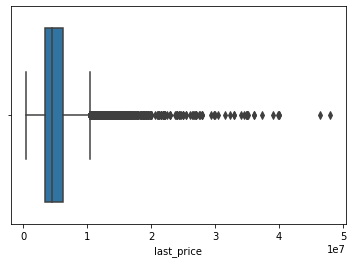

In [ ]:
# построим боксплот и оценим долю выбросов
sns.boxplot(x=data['last_price'])

In [ ]:
heavy_emissions_num(data, 'kitchen_area')

'процент жёстких выбросов составляет 0.26'

Аномалий в целевой переменной не выявлено, есть большие цены, связаные с близостью к центру города

##### Количество комнат

In [ ]:
# изучим количество комнат
data['rooms'].describe()

count   19462.000
mean        1.959
std         0.873
min         1.000
25%         1.000
50%         2.000
75%         3.000
max         6.000
Name: rooms, dtype: float64

<AxesSubplot:ylabel='Frequency'>

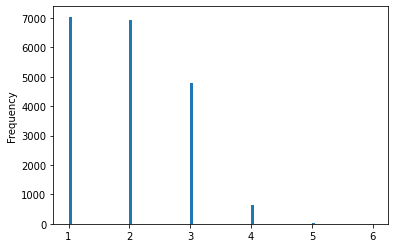

In [ ]:
data['rooms'].plot(bins=100, kind='hist')

Аномалий не выявлено, чаще всего представлены объекты с 1 или 2 комнатами

##### Высота потолков

In [ ]:
# изучим высоту потолков
data['ceiling_height'].describe()

count   12259.000
mean        2.733
std         1.271
min         1.000
25%         2.500
50%         2.600
75%         2.750
max       100.000
Name: ceiling_height, dtype: float64

In [ ]:
data['ceiling_height'].median()

2.6

<AxesSubplot:ylabel='Frequency'>

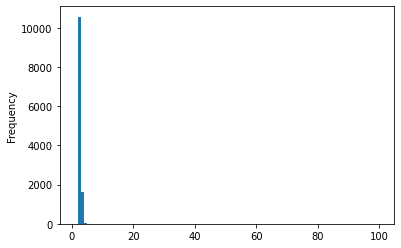

In [ ]:
data['ceiling_height'].plot(bins=100, kind='hist')

<AxesSubplot:xlabel='ceiling_height'>

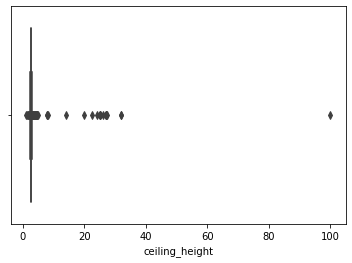

In [ ]:
# построим боксплот и оценим выбросы
sns.boxplot(x=data['ceiling_height'])

In [ ]:
# некоторые значения экстремально высокие, сделаем оценку относительно общей площади
data.query('ceiling_height > 20')['total_area'].describe()

count   17.000
mean    50.547
std     17.927
min     25.000
25%     42.000
50%     45.000
75%     58.000
max     92.400
Name: total_area, dtype: float64

In [ ]:
# площадь не является слишком большой, скорее всего в данных ошибка и некоторые пользователи не указывали дробное деление.
# проверим записи о потолках от 10 до 20 м, то есть те, что были бы слишком низкими при делении на 10
data.query('10 < ceiling_height < 13')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_short_name,sqr_m_price,week_number,month_number,year_number,floor_type,city_сenters_nearest_km


In [ ]:
# ограничим высоту потолков 6 метрами
def make_ceiling_lower(ceiling):
    if ceiling >= 20:
        return ceiling/10
    return ceiling

In [ ]:
data['ceiling_height'] = data['ceiling_height'].apply(make_ceiling_lower)
data['ceiling_height'].describe()

count   12259.000
mean        2.693
std         0.278
min         1.000
25%         2.500
50%         2.600
75%         2.750
max        14.000
Name: ceiling_height, dtype: float64

В параметре высоты потолка найдена аномалия - некоторые были указаны некорректно из-за этого были слишком высокими.

##### Типы этажей

In [ ]:
# изучим типы этажей
data['floor_type'].describe()

count      19462
unique         3
top       другой
freq       14270
Name: floor_type, dtype: object

<AxesSubplot:>

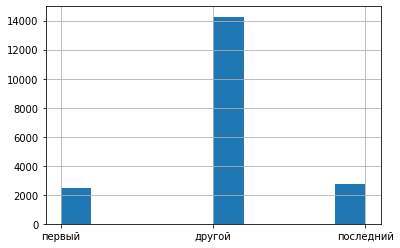

In [ ]:
data['floor_type'].hist()

In [ ]:
data.pivot_table(index='floor_type', aggfunc='count', values='total_images')

,total_images
floor_type,
другой,14270
первый,2457
последний,2735


Наиболее часто представлены этажи категории другой, частота первых и последних этажей практически одинаковая

##### Количество этажей в доме

In [ ]:
# изучим общее кол-во этажей в доме
data['floors_total'].describe()

count   19462.000
mean       10.692
std         6.557
min         1.000
25%         5.000
50%         9.000
75%        16.000
max        60.000
Name: floors_total, dtype: float64

In [ ]:
# изучим данные без влияния пропусков, которые мы заменили на -1
data.query('floors_total>0')['floors_total'].describe()

count   19462.000
mean       10.692
std         6.557
min         1.000
25%         5.000
50%         9.000
75%        16.000
max        60.000
Name: floors_total, dtype: float64

<AxesSubplot:>

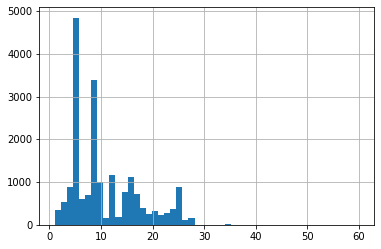

In [ ]:
data['floors_total'].hist(bins=50)

In [ ]:
data.pivot_table(index='floors_total', aggfunc='count', values='total_images').sort_values(by='total_images', ascending=False)

,total_images
floors_total,
5,4847
9,3395
12,1170
16,1127
10,1002
4,890
25,874
17,713
6,615


Предствалено широкое кол-во этажей, с пропусками начиная с 30 этажей. Чаще всего выкладывают объявления с 5 или 9 этажом, при этом в среднем это 10-11 этаж

##### Расстояние до центра города

In [ ]:
# изучим расстояние до центра города в метрах
data['city_сenters_nearest_km'].describe()

count   19462.000
mean       11.312
std         9.765
min         0.000
25%         2.000
50%        12.000
75%        16.000
max        66.000
Name: city_сenters_nearest_km, dtype: float64

<AxesSubplot:>

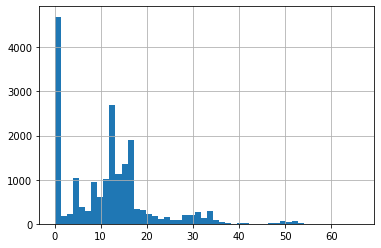

In [ ]:
data['city_сenters_nearest_km'].hist(bins=50)

In [ ]:
data.pivot_table(index='city_сenters_nearest_km', aggfunc='count', values='total_images').sort_values(by='total_images', ascending=False).head(10)

,total_images
city_сenters_nearest_km,
0,4588
12,1410
15,1358
13,1278
14,1140
16,1119
11,1020
17,784
10,617


Чаще всего объекты находятся менее, чем в 1 км от центра города, тем не менее, в большинстве случаев они находятся в пределах 12-16 км

##### Расстояние до ближайшего парка

In [ ]:
# изучим расстояние до ближайшего парка
data['parks_nearest'].describe()

count   19462.000
mean      160.153
std       299.186
min         0.000
25%         0.000
50%         0.000
75%       279.000
max      3190.000
Name: parks_nearest, dtype: float64

<AxesSubplot:>

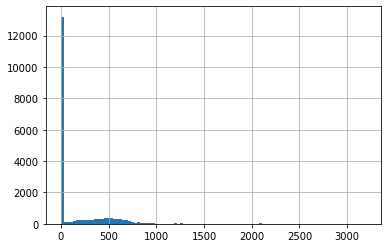

In [ ]:
data['parks_nearest'].hist(bins=100)

In [ ]:
data.pivot_table(index='parks_nearest', aggfunc='count', values='total_images').sort_values(by='total_images', ascending=False).head(10)

,total_images
parks_nearest,
0,13116
441,36
392,29
456,29
173,28
541,24
458,24
471,24
223,23


Абсолютное большинство парков находится на расстоянии менее 1 км.

#### Скорость продажи квартир

In [ ]:
data['days_exposition'].describe()

count   16942.000
mean      178.618
std       214.312
min         1.000
25%        43.000
50%        98.000
75%       229.000
max      1580.000
Name: days_exposition, dtype: float64

<AxesSubplot:>

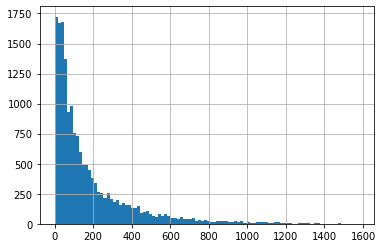

In [ ]:
data['days_exposition'].hist(bins=100)

In [ ]:
data_days = data['days_exposition']
data_days.fillna(-1)
data_days = data_days[data_days>-1]
data_days.describe()

count   16942.000
mean      178.618
std       214.312
min         1.000
25%        43.000
50%        98.000
75%       229.000
max      1580.000
Name: days_exposition, dtype: float64

In [ ]:
mean_value = data_days.mean()
median_value = data_days.median()

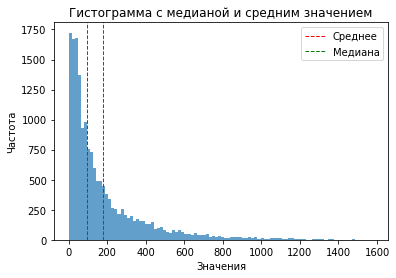

In [ ]:
# построим гистограмму с вертикальными линиями медианы и среднего значения
plt.hist(data_days, bins=100, alpha=0.7)
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label='Среднее')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label='Медиана')
plt.legend()

# Названия осей и заголовок
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма с медианой и средним значением')

# Показать график
plt.show()

<AxesSubplot:xlabel='days_exposition'>

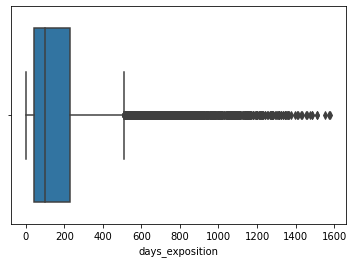

In [ ]:
sns.boxplot(x=data['days_exposition'])

In [ ]:
# оценим долю пропусков
emissions(data, 'days_exposition')

'процент выбросов составляет 6.85'

In [ ]:
# с помощью сводной таблицы рассчитаем наиболее частые случаи
data.pivot_table(index='days_exposition', aggfunc='count', values='total_images').sort_values(by='total_images', ascending=False).head(10)

,total_images
days_exposition,
45,517
60,333
7,198
30,185
4,155
3,141
14,129
20,127
5,125


Таким образом, согласно медианному значению, типичная скорость продажи квартир - примерно 100 дней. Среднее значение почти в два раза превышает медианное, это связано с выбросами в большую сторону (~6%), которые сильно влияют на среднее. Максимальное значение - 1580 дней, что составляет практически 4,5 года, при этом самая быстрая продажа состоялась лишь за 1 день. Продажу менее чем за 40 дней можно считать быстрой, согласно сводной таблице, множество случаев соответствует продаже менее чем за неделю. Медленная продажа - более чем за 250 дней (около 8 месяцев).

<AxesSubplot:>

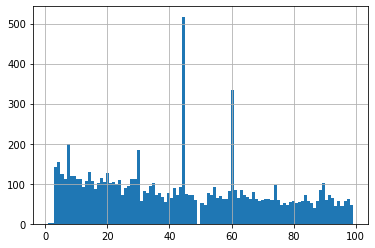

In [ ]:
data.query('days_exposition < 100')['days_exposition'].hist(bins=100)

Пики и спады можно объяснить сроками публикации в Яндекс.Недвижимость

#### Зависимость стоимости объекта от прочих факторов

In [ ]:
# для изучения зависимостей построим матрицу корреляций и графики рассеяния
price_corr_data = data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']]
corr = price_corr_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.682910,0.558062,0.500861,0.393602
total_area,0.682910,1.000000,0.915868,0.467710,0.793538
living_area,0.558062,0.915868,1.000000,0.187822,0.894696
kitchen_area,0.500861,0.467710,0.187822,1.000000,0.044139
rooms,0.393602,0.793538,0.894696,0.044139,1.000000


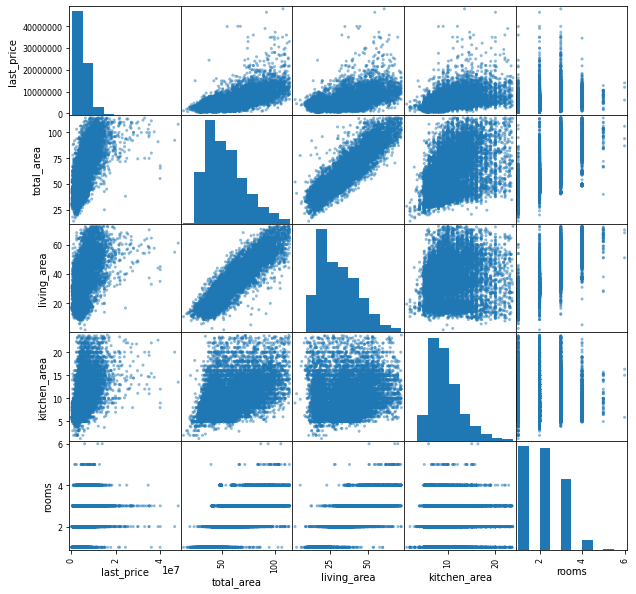

In [ ]:
# построим матрицу диаграмм рассеяния
price_multi = data.pivot_table(index='last_price', values=['total_area', 'living_area', 'kitchen_area', 'rooms'])
pd.plotting.scatter_matrix(price_corr_data, figsize=(10,10));

Из матриц корреляций и графиков видим, что наибольшая линейная зависимость цены прослеживается от общей площади, площади кухни и жилой площади. Рассмотрим остальные факторы более подробно.

In [ ]:
# с помощью сводной таблицы и графика рассеяния оценим зависимость цены от кол-ва комнат
rooms_data = pd.pivot_table(data=data, index='rooms', values='last_price', aggfunc=['median', 'max', 'count'])
rooms_data.columns = ['median', 'max', 'count']
rooms_data.sort_values(by='median', ascending=False)

,median,max,count
rooms,,,
6,12000000,14000000,3
5,7625000,12780000,42
4,6900000,34551000,648
3,5900000,48000000,4802
2,4700000,46424072,6924
1,3600000,39900000,7043


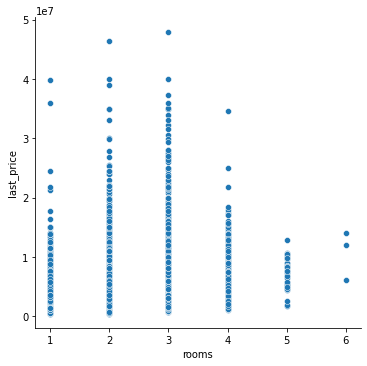

In [ ]:
sns.relplot(x ='rooms', y ='last_price', data = data);

Таким образом, среднее цена повышается при увеличении количества комнат, при этом наибольшая цена соответствует 3 и 2 комнатам. Чем больше комнат, тем меньше данных.

In [ ]:
# с помощью сводной таблицы  оценим зависимость цены от этажа, на котором расположена квартира
floor_data = pd.pivot_table(data=data, index='floor_type', values='last_price', aggfunc=['median', 'max', 'min', 'count'])
floor_data.columns = ['median', 'max', 'min', 'count']
floor_data.sort_values(by='median', ascending=False)

,median,max,min,count
floor_type,,,,
другой,4700000,48000000,450000,14270
последний,4120000,46424072,470000,2735
первый,3900000,33000000,430000,2457


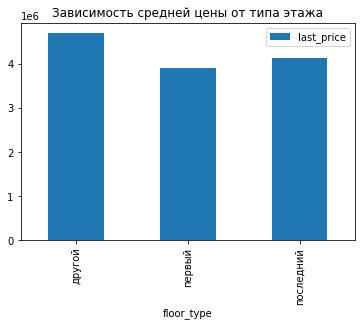

In [ ]:
pd.pivot_table(data=data, index='floor_type', values='last_price', aggfunc='median').plot(
    kind='bar', y='last_price', title='Зависимость средней цены от типа этажа'
);

Таким образом, в среднем наибольшая цена у объектов, расположенных на другом этаже, также этот тип соотвествует наибольшей и наименьшей из предложенных цен и практически в 7 раз количественно превышает другие предложения. В среднем наименьшая цена у квартир на первом этаже.

In [ ]:
# проанализируем взаимосвязь цены и даты размещения
week_data = pd.pivot_table(data=data, index='week_number', values='last_price', aggfunc=['median', 'max', 'min', 'count'])
week_data.columns = ['median', 'max', 'min', 'count']
display(week_data.sort_values(by='median', ascending=False))

month_data = pd.pivot_table(data=data, index='month_number', values='last_price', aggfunc=['median', 'max', 'min', 'count'])
month_data.columns = ['median', 'max', 'min', 'count']
display(month_data.sort_values(by='median', ascending=False))

year_data = pd.pivot_table(data=data, index='year_number', values='last_price', aggfunc=['median', 'max', 'min', 'count'])
year_data.columns = ['median', 'max', 'min', 'count']
display(year_data.sort_values(by='median', ascending=False))

,median,max,min,count
week_number,,,,
1,4550000,46424072,500000,3456
2,4539000,36000000,530000,3264
0,4500000,26990000,430000,3004
3,4500000,48000000,450000,3513
4,4490000,33000000,450000,3298
6,4490000,37272000,470000,1361
5,4450000,34551000,550000,1566


,median,max,min,count
month_number,,,,
4,4650000,35000000,430000,2006
12,4600000,46424072,600000,1223
9,4550000,26990000,520000,1687
1,4500000,35000000,620000,1164
2,4500000,48000000,450000,2127
3,4500000,33000000,550000,2116
8,4500000,36000000,450000,1449
10,4500000,39900000,600000,1831
11,4500000,36000000,560000,1993


,median,max,min,count
year_number,,,,
2014,5920000,46424072,1200000,94
2019,4900000,33000000,430000,2402
2015,4885000,39990000,650000,920
2018,4500000,48000000,450000,6844
2016,4350000,39000000,490000,2327
2017,4350000,40000000,450000,6875


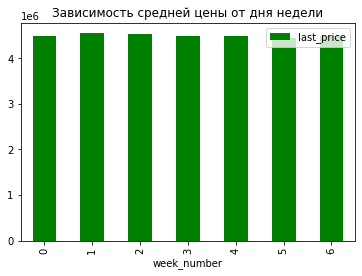

In [ ]:
# построим соответствующие столбчатые графики по средней цене
pd.pivot_table(data=data, index='week_number', values='last_price', aggfunc='median').plot(
    kind='bar', y='last_price', title='Зависимость средней цены от дня недели', color='green'
);

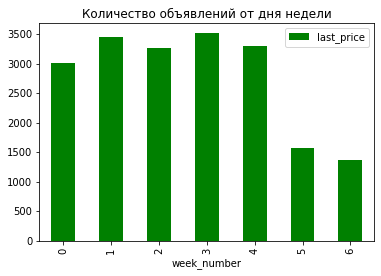

In [ ]:
pd.pivot_table(data=data, index='week_number', values='last_price', aggfunc='count').plot(
    kind='bar', y='last_price', color='green', title='Количество объявлений от дня недели'
);

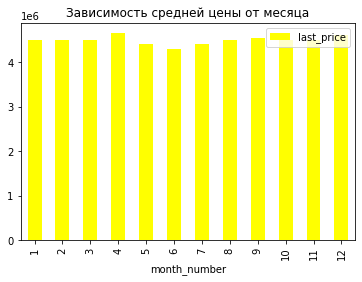

In [ ]:
pd.pivot_table(data=data, index='month_number', values='last_price', aggfunc='median').plot(
    kind='bar', y='last_price', color='yellow', title='Зависимость средней цены от месяца'
);

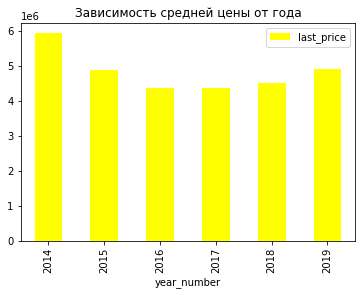

In [ ]:
pd.pivot_table(data=data, index='year_number', values='last_price', aggfunc='median').plot(
    kind='bar', y='last_price', color='yellow', title='Зависимость средней цены от года'
);

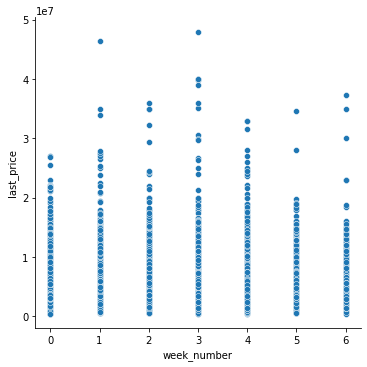

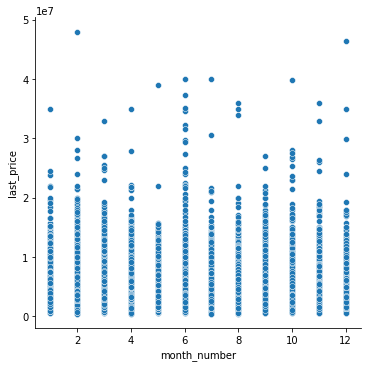

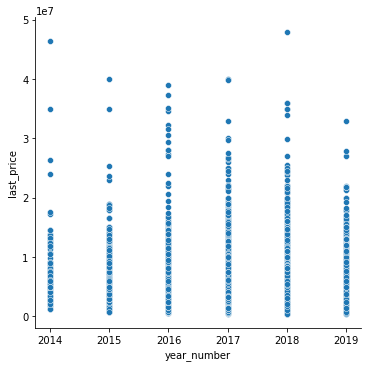

In [ ]:
sns.relplot(x ='week_number', y ='last_price', data = data);
sns.relplot(x ='month_number', y ='last_price', data = data);
sns.relplot(x ='year_number', y ='last_price', data = data);

Таким образом, данные показали, что средняя цена не сильно разнится в разные дин недели, при этом количество выставленных объявлений в выходные дни наименьшее.

Разбивка по месяцам показала, что наивысшая цена квартир соответствует объявленям, выставленным в апреле, декабре и сентябре

Средняя цена была наивысшей в 2014 году, однако, наблюдений по этому году, как и по 2015, слишком мало - выборка не репрезентативна, следовательно, не учитывая этот год, высшая цена в 2019 году. Также цена поднимается каждый год, что соответствует тенденции инфляции.

#### Анализ цен квадратного метра в населённых пунктах

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19462 entries, 0 to 19461
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             19462 non-null  int64         
 1   last_price               19462 non-null  int64         
 2   total_area               19462 non-null  float64       
 3   first_day_exposition     19462 non-null  datetime64[ns]
 4   rooms                    19462 non-null  int64         
 5   ceiling_height           12259 non-null  float64       
 6   floors_total             19462 non-null  int64         
 7   living_area              19462 non-null  float64       
 8   floor                    19462 non-null  int64         
 9   is_apartment             2329 non-null   object        
 10  studio                   19462 non-null  bool          
 11  open_plan                19462 non-null  bool          
 12  kitchen_area             19462 n

In [ ]:
# выделим ТОП 10 населённых пунктов по кол-ву объявлений
locality_fr = pd.pivot_table(data=data, index='locality_short_name', values='sqr_m_price', aggfunc=['median', 'count'])
locality_fr.columns = ['median', 'count']
top_locality = locality_fr.sort_values(by='count', ascending=False).head(10)
top_locality

,median,count
locality_short_name,,
Санкт-Петербург,103000.000,12703
Мурино,85505.415,454
Шушары,77352.940,387
Кудрово,95801.790,370
Всеволожск,65789.470,350
Колпино,74725.270,319
Пушкин,98547.275,306
Парголово,92271.975,288
Гатчина,67695.960,285


In [ ]:
# отсортирует ТОП по медианному значению
top_locality.sort_values(by = 'median', ascending = False)

,median,count
locality_short_name,,
Санкт-Петербург,103000.000,12703
Пушкин,98547.275,306
Кудрово,95801.790,370
Парголово,92271.975,288
Мурино,85505.415,454
Петергоф,81901.425,184
Шушары,77352.940,387
Колпино,74725.270,319
Гатчина,67695.960,285


Таким образом, в 10 населённых пунктах с наибольшим числом объявлений ТОП-1 по средней цене квадратного метра Санкт-Петербург, где значение примерно равно 100 тыс. руб, а последний в списке, то есть ТОП 10 - Всеволожск, где средняя стоимость квадратного метра составляет 65,7 тыс руб.

#### Анализ средней стоимости квартир на разном удалении от центра Санкт-Перербурга

In [ ]:
# выделим данные по Санкт-Петербургу
main_city_data = data[data['locality_name'] == 'Санкт-Петербург'].reset_index(drop=True)
main_city_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_short_name,sqr_m_price,week_number,month_number,year_number,floor_type,city_сenters_nearest_km
0,10,5196000,56.000,2015-08-20,2,NaN,5,34.300,4,NaN,False,False,8.300,0,Санкт-Петербург,21741,13933,1,90,2,574,558,Санкт-Петербург,92785.710,3,8,2015,другой,14
1,18,5400000,61.000,2017-02-26,3,2.500,9,43.600,7,NaN,False,False,6.500,2,Санкт-Петербург,50898,15008,0,0,0,0,289,Санкт-Петербург,88524.590,6,2,2017,другой,15
2,5,5050000,39.600,2017-11-16,1,2.670,12,20.300,3,NaN,False,False,8.500,0,Санкт-Петербург,38357,13878,1,310,2,553,137,Санкт-Петербург,127525.250,3,11,2017,другой,14
3,16,4650000,39.000,2017-11-18,1,NaN,14,20.500,5,NaN,False,False,7.600,1,Санкт-Петербург,12900,14259,1,590,1,296,19,Санкт-Петербург,119230.770,5,11,2017,другой,14
4,11,6700000,82.000,2017-11-23,3,3.050,5,55.600,1,NaN,False,False,9.000,0,Санкт-Петербург,22108,10698,3,420,0,0,397,Санкт-Петербург,81707.320,3,11,2017,первый,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12698,6,3200000,39.000,2017-12-16,1,NaN,9,20.000,6,NaN,False,False,11.000,2,Санкт-Петербург,40837,16704,0,0,0,0,38,Санкт-Петербург,82051.280,5,12,2017,другой,17
12699,19,9200000,101.000,2019-04-01,3,3.050,15,63.000,12,NaN,False,False,15.000,0,Санкт-Петербург,15632,14428,0,0,0,0,23,Санкт-Петербург,91089.110,0,4,2019,другой,14
12700,13,3550000,35.300,2018-02-28,1,2.860,15,16.300,4,NaN,False,False,9.100,2,Санкт-Петербург,17284,16081,1,353,2,652,29,Санкт-Петербург,100566.570,2,2,2018,другой,16
12701,3,5500000,52.000,2018-07-19,2,NaN,5,31.000,2,NaN,False,False,6.000,0,Санкт-Петербург,20151,6263,1,300,0,0,15,Санкт-Петербург,105769.230,3,7,2018,другой,6


In [ ]:
main_city_data['city_сenters_nearest_km'].describe()

count   12703.000
mean       12.031
std         4.588
min         0.000
25%         9.000
50%        13.000
75%        15.000
max        29.000
Name: city_сenters_nearest_km, dtype: float64

In [ ]:
display(main_city_data.pivot_table(index='city_сenters_nearest_km', values='last_price', aggfunc='median'))

disposition = main_city_data.pivot_table(index='city_сenters_nearest_km', values='last_price', aggfunc=['median', 'count'])
disposition.columns = ['median', 'count']
display(disposition.sort_values(by='median', ascending=False))

,last_price
city_сenters_nearest_km,
0,6875000
1,9000000
2,8800000
3,7325000
4,7700000
5,7800000
6,7300000
7,6650000
8,6570000


,median,count
city_сenters_nearest_km,,
1,9000000,106
2,8800000,175
5,7800000,583
4,7700000,436
3,7325000,228
6,7300000,390
0,6875000,46
7,6650000,298
8,6570000,447


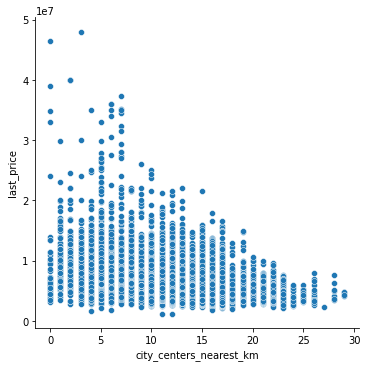

In [ ]:
# построим диаграмму рассеяния
sns.relplot(x ='city_сenters_nearest_km', y ='last_price', data = main_city_data)

In [ ]:
# посчитаем коэф-т корреляции для данных
main_city_data['last_price'].corr(data['city_сenters_nearest_km'])

-0.01789884234889188

In [ ]:
# так как корреляция оказалась слабой, попробуем избавиться от выбросов, возможно они влияют на некорректный расчёт
remove_emissions(main_city_data, 'city_сenters_nearest_km')['last_price'].corr(remove_emissions(main_city_data, 'city_сenters_nearest_km')['city_сenters_nearest_km'])

-0.370180515150584

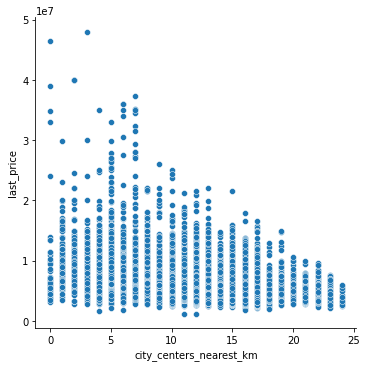

In [ ]:
# действительно, после удаления выбросов прослеживается отрицательная корреляция, построим график
sns.relplot(x ='city_сenters_nearest_km', y ='last_price', data = remove_emissions(main_city_data, 'city_сenters_nearest_km'))

Таким образом, удалённость от центра негативно влияет на стоимость объекта, самые высокие средние цены наблюдаются в пределах 5 км от центра

###Общий вывод

**Вывод**: в ходе исследования были изучены и проанализированы данные о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Пропуски в данных, заполненных вручную, объяснимы человеческим фактором, в большей степени они связаны с измерением площадей и высот. Пропуски в данных, полученых автоматически на основе картографических данных, возникли из-за отсутствия тех или иных объектов - парков, водоёмов, центра города (в деревнях, сёлах). Далее была проведена работа с типами данных для корректныхь расчётов и неявными дубликатами в названиях населённых пунктов - добавлен столбец с укороченными названиями. Также по числовым данным был проведёт более детальный анализ - описание и удаление выбросов, были найдены и устранены аномалии в столбце с высотой потолков. Для дальнейшего анализа добавлены столбцы.

Изучив скорость продажи было выявлено, что среднее значение - 100 дней, продажу менее чем за 40 дней можно считать быстрой, а более чем за 250 дней - медленной.

На стоимость объекта в большей степени влияют общая площадь, площади жилой зоны и кухни, а также количество комнат. Наиболее часто продаются кватриры на средних этажах, наименьшая стоимость у квартир первого этажа. С каждым годом средняя цена объектов растёт, меньше всего объявлений выставляется в выходные, сентябрь, апрель и декабрь - месяца с наибольшей стоимостью квартир.

Наибольшая цена квадратного метра в ТОП-10 городов с наибольшим количеством объявлений в Санкт-Петербурге, что составляет около 100 тыс руб. Завершает ТОП Всеволожск, где параметр практически вдвое меньше - 65,78 тыс руб.